In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

In [8]:
dat = {'x' : [0.0, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9,10, 11, 12,13.0, 14, 15, 30.0, 35],
       'y' : [  0, 0,   0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11.0, 12, 13, 28.0, 28]  }
DTSMTB = pd.DataFrame(dat)


Text(0.5, 1.0, 'DTSMTB AFGEN')

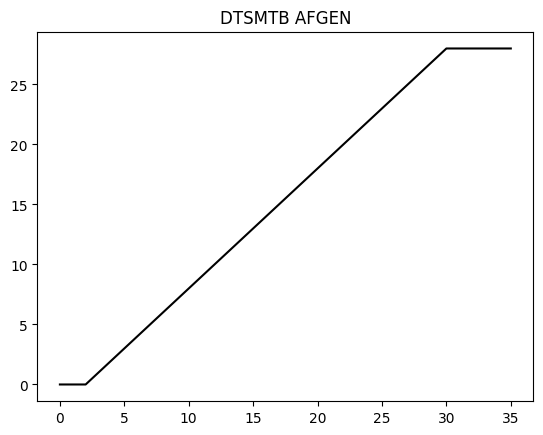

In [9]:
plt.plot(dat['x'], dat['y'], color = 'black')
plt.title('DTSMTB AFGEN')

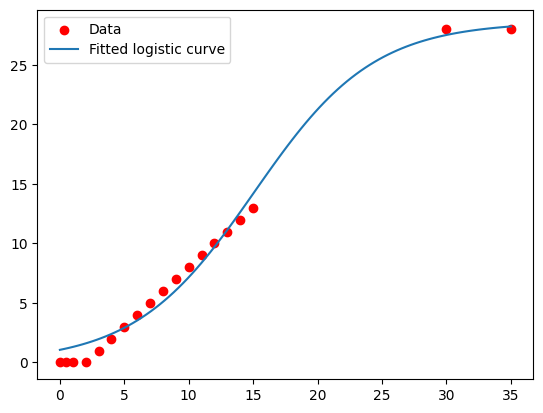

In [10]:
# Define logistic function
def logistic(x, L, x0, k):
    return L / (1 + np.exp(-(x - x0) / k))

# Initial guess: L=30 (max y-value), x0=15 (mid-point of x), k=1 (arbitrary)
initial_guess = [30, 15, 1]

# Set parameter bounds: [0, inf] for L, [-inf, inf] for x0, [0, inf] for k
bounds = ([0, -np.inf, 0], [np.inf, np.inf, np.inf])

# Fit logistic curve
params, cov = curve_fit(logistic, DTSMTB['x'], DTSMTB['y'], p0=initial_guess, bounds=bounds, maxfev=5000)

# Continue as before...

# params, cov = curve_fit(logistic, DTSMTB['x'], DTSMTB['y'])


# Extract parameters
L, x0, k = params


# Generate fitted curve
x_values = np.linspace(min(DTSMTB['x']), max(DTSMTB['x']), 100)
y_values = logistic(x_values, L, x0, k)

# Plot
plt.scatter(DTSMTB['x'], DTSMTB['y'], c = 'red', label='Data')
plt.plot(x_values, y_values, label='Fitted logistic curve')
plt.legend()
plt.show()


In [ ]:


# Define the exponential function
def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

# Your data
dat = {'x': [0.0, 2.0, 13.0, 30.0, 35.0],
       'y': [0.0, 0.0, 11.0, 28.0, 28.0]}
DTSMTB = pd.DataFrame(dat)

# Fit the curve
params, covariance = curve_fit(exp_func, DTSMTB['x'], DTSMTB['y'], maxfev=5000)

# Parameters: a, b, c
print("Fitted parameters: ", params)

# Extract parameters
a, b, c = params


# Generate fitted curve
x_values = np.linspace(min(DTSMTB['x']), max(DTSMTB['x']), 1000)
y_values = exp_func(x_values, *params)

# Plot
plt.scatter(DTSMTB['x'], DTSMTB['y'], label='Data')
plt.plot(x_values, y_values, label='Fitted curve')
plt.legend()
plt.show()


In [ ]:
def sigmoid_func(x):
    return 1 / (1 + np.exp(-x)) + x

# Your original data points
plt.scatter(DTSMTB['x'], DTSMTB['y'], label='Data', color='red')

# Generate x-values for the fitted curve
x_fit = np.linspace(min(DTSMTB['x']), max(DTSMTB['x']), 100)

# Calculate the y-values based on the sigmoid function
y_fit = sigmoid_func(x_fit)

# Plot the fitted curve
plt.plot(x_fit, y_fit, label='Fitted Curve', color='blue')

# Additional plot settings
plt.title('Sigmoid Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()



In [ ]:
# TMPFTB  - reduction factor of AMAX as function of average daytime (*not* daily)  temperature

TMPFTB = pd.DataFrame( {'x': [0.0,  3.0, 10.0, 15.0, 20.0, 26.0, 33.0],
                        'y' : [0.010, 0.010, 0.750, 1.000, 1.000, 0.750, 0.010] })

In [ ]:
plt.plot(TMPFTB['x'], TMPFTB['y'])

In [ ]:
from scipy.interpolate import UnivariateSpline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create the DataFrame
TMPFTB = pd.DataFrame({
    'x': [0.0, 3.0, 10.0, 15.0, 20.0, 26.0, 33.0],
    'y': [0.010, 0.010, 0.750, 1.000, 1.000, 0.750, 0.010]
})

# Fit the cubic spline
spline = UnivariateSpline(TMPFTB.x, TMPFTB.y, k=3, s=0)

# Generate points for plotting the curve
x_range = np.linspace(min(TMPFTB.x), max(TMPFTB.x), 300)
y_spline = spline(x_range)

# Plot the original points
plt.scatter(TMPFTB.x, TMPFTB.y, color='red', label='Data')

# Plot the fitted curve
plt.plot(x_range, y_spline, color='blue', label='Fitted Spline')

# Additional plot settings
plt.title('Cubic Spline Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize variables
T_L = 292
T_H = 303
T_AL = 20000
T_AH = 60000

# Create the x and x.t arrays
x = np.arange(1, 4001, 1)
x_t = x / 100.0

# Compute Tt using the given formula
Tt = (1 + np.exp(T_AL / (x_t + 273) - T_AL / T_L) + np.exp(T_AH / T_H - T_AH / (x_t + 273))) ** -1

# Normalize Tt by dividing by its max value
Tt_normalized = Tt / np.max(Tt)

# Visualize the normalized Tt
plt.plot(x_t, Tt, label = 'Tt')

plt.plot(x_t, Tt_normalized, label = "Tt_normalized")
plt.scatter(TMPFTB['x'], TMPFTB['y'], label='Data', color='red')
plt.ylabel('Tt')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize variables
T_L = 285
T_H = 303
T_AL = 20000
T_AH = 60000

# Create the x and x.t arrays
x = np.arange(1, 4001, 1)
x_t = x / 100.0

# Compute Tt using the given formula
Tt = (0.2 + np.exp(T_AL / (x_t + 273) - T_AL / T_L) + np.exp(T_AH / T_H - T_AH / (x_t + 273))) ** -1

# Normalize Tt by dividing by its max value
Tt_normalized = Tt / np.max(Tt)

# Visualize the normalized Tt
plt.plot(x_t, Tt, label = 'Tt')

plt.plot(x_t, Tt_normalized, label = "Tt_normalized")
plt.scatter(TMPFTB['x'], TMPFTB['y'], label='Data', color='red')
plt.ylabel('Tt')
plt.legend()
plt.show()

In [ ]:
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data
TMPFTB = pd.DataFrame({
    'x': [0.0, 3.0, 10.0, 15.0, 20.0, 26.0, 33.0],
    'y': [0.010, 0.010, 0.750, 1.000, 1.000, 0.750, 0.010]
})

# Function to fit
def fit_func(x, T_L, T_H):
    T_AL = 20000
    T_AH = 60000
    x_t = x / 100
    return (1 + np.exp(T_AL / (x_t + 273) - T_AL / T_L) + np.exp(T_AH / T_H - T_AH / (x_t + 273))) ** -1

# Curve fitting
initial_guess = [292, 302]
params, params_covariance = curve_fit(fit_func, TMPFTB['x'], TMPFTB['y'])

# Extract fitted parameters
T_L_fitted, T_H_fitted = params

# Generate fitted curve
x_values = np.linspace(0, 35, 400)
y_values_fitted = fit_func(x_values, T_L_fitted, T_H_fitted)

# Plot
plt.scatter(TMPFTB['x'], TMPFTB['y'], label='Data', color='red')
plt.plot(x_values, y_values_fitted, label=f'Fitted Curve\n$T_L$={T_L_fitted:.2f}, $T_H$={T_H_fitted:.2f}', color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

print(f"Fitted T_L: {T_L_fitted}, Fitted T_H: {T_H_fitted}")
